# **1. Loading Data**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/francetravail.csv")

df.head()

,id,intitule,description,dateCreation,dateActualisation,romeCode,romeLibelle,appellationlibelle,typeContrat,typeContratLibelle,...,salaire.complement2,salaire.listeComplements,deplacementCode,deplacementLibelle,entreprise.url,contact.courriel,contexteTravail.conditionsExercice,origineOffre.partenaires,complementExercice,contact.telephone
0,198ZDPY,Développeur informatique (F/H),Envie d'un poste où votre code ne reste pas da...,2025-10-10T17:41:54.164Z,2025-10-10T17:41:54.341Z,M1805,Développeur / Développeuse informatique,Développeur / Développeuse informatique,CDI,CDI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,198YHRB,Développeur / Développeuse informatique (H/F),Nous vous proposons une Préparation opération...,2025-10-10T10:13:22.815Z,2025-10-10T10:16:46.808Z,M1805,Développeur / Développeuse informatique,Développeur / Développeuse informatique,CDD,CDD - 16 Mois,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,198YBFK,Développeur informatique (F/H),Vous intégrerez une équipe de trois développeu...,2025-10-09T19:32:29.978Z,2025-10-10T10:33:42.379Z,M1805,Développeur / Développeuse informatique,Développeur / Développeuse informatique,MIS,Intérim - 5 Mois,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,198XWBC,Développeur informatique mobile androïd (H/F),Votre mission consiste à développer des applic...,2025-10-09T16:07:10.468Z,2025-10-10T18:17:34.697Z,M1805,Développeur / Développeuse informatique,Développeur / Développeuse informatique,CDI,CDI,...,Complémentaire santé,"[{""code"": ""1"", ""libelle"": ""Primes""}, {""code"": ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,198WPLD,Développeur / Développeuse informatique (H/F),Notre entreprise poursuit sa transformation di...,2025-10-08T14:49:07.935Z,2025-10-08T16:54:06.231Z,M1805,Développeur / Développeuse informatique,Développeur / Développeuse informatique,CDI,CDI,...,Titres restaurant / Prime de panier,"[{""code"": ""14"", ""libelle"": ""Indemnité transpor...",1.0,Jamais,http://www.i-interim.com,"Pour postuler, utiliser le lien suivant : http...",NaN,NaN,NaN,NaN


# **2. Data Cleaning**

In [5]:
col = ['intitule','dateCreation','typeContrat','nombrePostes','lieuTravail.libelle','lieuTravail.latitude', 'lieuTravail.longitude','lieuTravail.codePostal', 'lieuTravail.commune', 'entreprise.nom','competences']

df = df[col]

In [6]:
## Total Offers

df.shape[0]

3740

In [7]:
## clean dataframe

df.dropna(how='all', inplace=True)

df.drop_duplicates(inplace=True)

## entreprise.nom

df['entreprise.nom'] = df['entreprise.nom'].dropna()

df['entreprise.nom'] = df['entreprise.nom'].str.upper()

df['entreprise.nom'] = df['entreprise.nom'].str.strip()

## typeContrat

df['typeContrat'].dropna(inplace=True)

df['typeContrat'] = df['typeContrat'].str.upper()

df['typeContrat'] = df['typeContrat'].str.strip()

## nombrePostes
df['nombrePostes'] = df['nombrePostes'].replace(0,1)

## lieuTravail.libelle

df['lieuTravail.libelle'].dropna(inplace=True)

df['lieuTravail.libelle'] = df['lieuTravail.libelle'].str.upper()

df['lieuTravail.libelle'] = df['lieuTravail.libelle'].str.strip()

df['lieuTravail.libelle'] = df['lieuTravail.libelle'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

df['lieuTravail.libelle'] = df['lieuTravail.libelle'].str.replace(r'\d+', '', regex=True)

## lieuTravail.commune

df['lieuTravail.commune'] = df['lieuTravail.commune'].astype(str)

df = df[df['lieuTravail.commune'].notna() & (df['lieuTravail.commune'].str.strip() != '')]

df = df[~df['lieuTravail.commune'].str.contains('[A-Za-z]', regex=True, na=False)]

df['lieuTravail.commune'] = df['lieuTravail.commune'].astype(float)

# **3. Data Analysis**

In [8]:
## Total Companies

df['entreprise.nom'].nunique()

973

In [23]:
## Total Posts

int(df['nombrePostes'].sum())

3120

In [10]:
## Map

# Ensure numeric coordinates
df['lieuTravail.latitude'] = pd.to_numeric(df['lieuTravail.latitude'], errors='coerce')
df['lieuTravail.longitude'] = pd.to_numeric(df['lieuTravail.longitude'], errors='coerce')

# Drop rows without coordinates
df_map = df.dropna(subset=['lieuTravail.latitude', 'lieuTravail.longitude'])

# Group by location
location_counts = df_map.groupby(
    ['lieuTravail.commune', 'lieuTravail.latitude', 'lieuTravail.longitude']
).size().reset_index(name='total_offers')

location_counts.head()

,lieuTravail.commune,lieuTravail.latitude,lieuTravail.longitude,total_offers
0,1004.0,45.958478,5.359569,1
1,1027.0,45.833131,5.096819,1
2,1034.0,45.760825,5.686305,2
3,1043.0,45.840303,5.001363,1
4,1053.0,46.205296,5.224853,2


In [11]:
import folium
from folium.plugins import MarkerCluster

# Compute center of map
lat_center = location_counts['lieuTravail.latitude'].mean()
lon_center = location_counts['lieuTravail.longitude'].mean()

# Create map
m = folium.Map(location=[lat_center, lon_center], zoom_start=6)

# Add markers with clustering
marker_cluster = MarkerCluster().add_to(m)

for idx, row in location_counts.iterrows():
    folium.CircleMarker(
        location=[row['lieuTravail.latitude'], row['lieuTravail.longitude']],
        radius=5 + row['total_offers']*0.5,  # size proportional to total offers
        popup=f"{row['lieuTravail.commune']}: {row['total_offers']} offres",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Display map
m

In [12]:
# Ensure dateCreation is datetime
df['dateCreation'] = pd.to_datetime(df['dateCreation'], errors='coerce')

# Drop rows with invalid dates
df_time = df.dropna(subset=['dateCreation'])

# Extract Year-Month
df_time['year_month'] = df_time['dateCreation'].dt.to_period('M')

# Group by month
offers_per_month = df_time.groupby('year_month').size().reset_index(name='total_offers')

# Convert year_month back to string for plotting
offers_per_month['year_month'] = offers_per_month['year_month'].astype(str)

/tmp/ipython-input-2125098089.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_time['year_month'] = df_time['dateCreation'].dt.to_period('M')


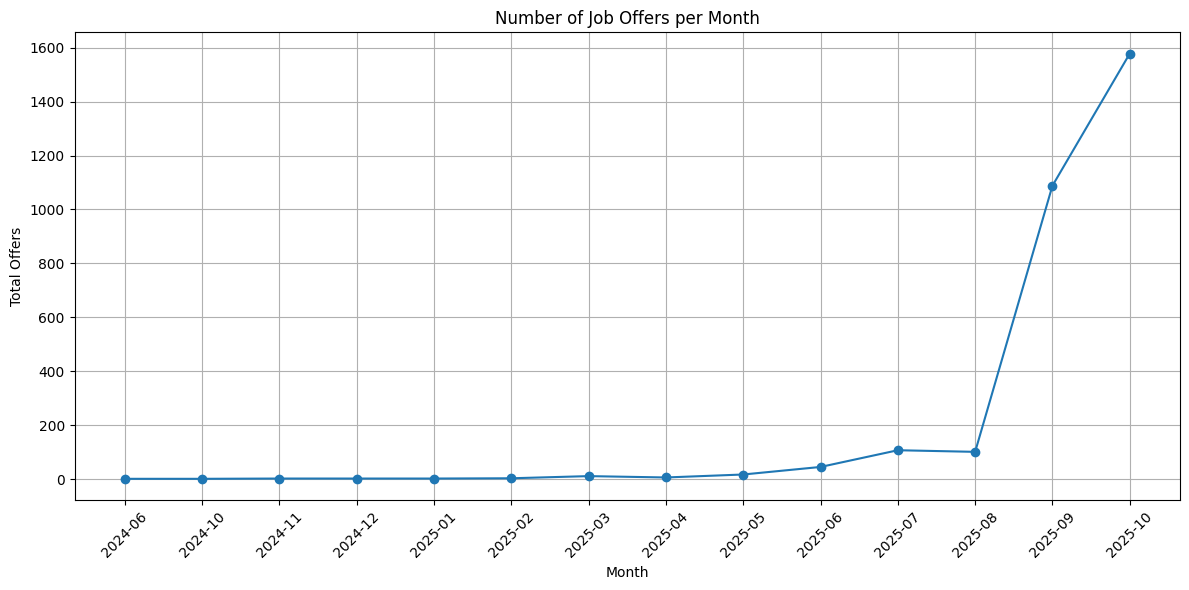

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(offers_per_month['year_month'], offers_per_month['total_offers'], marker='o')
plt.xticks(rotation=45)
plt.title("Number of Job Offers per Month")
plt.xlabel("Month")
plt.ylabel("Total Offers")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

# Drop rows without commune
df_commune = df.dropna(subset=['lieuTravail.libelle'])

# Group by commune and count offers
top_communes = df_commune.groupby('lieuTravail.libelle').size().reset_index(name='total_offers')

# Sort descending
top_communes = top_communes.sort_values(by='total_offers', ascending=False)

# Show top 10 communes
top_communes.head(10)

,lieuTravail.libelle,total_offers
551,NANTES,93
585,PARIS,92
797,TOULOUSE,92
106,BORDEAUX,87
587,PARIS E ARRONDISSEMENT,77
586,PARIS,77
530,MONTPELLIER,47
237,COURBEVOIE,47
452,LYON E ARRONDISSEMENT,42
777,STRASBOURG,39


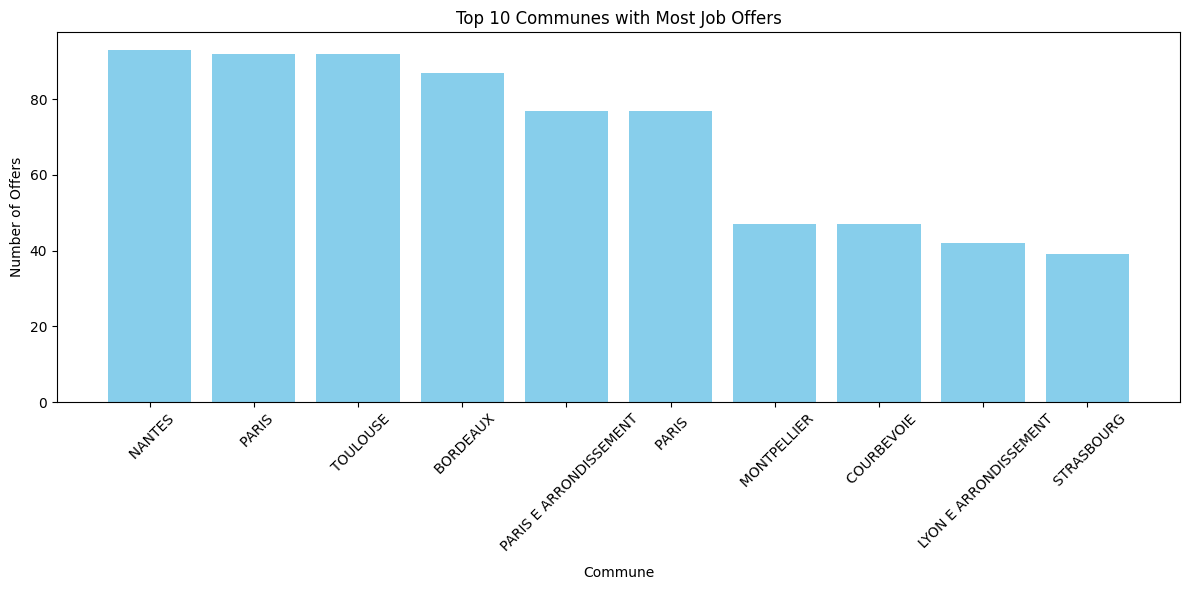

In [15]:
# Get top 10 communes
top_10 = top_communes.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10['lieuTravail.libelle'], top_10['total_offers'], color='skyblue')
plt.title("Top 10 Communes with Most Job Offers")
plt.xlabel("Commune")
plt.ylabel("Number of Offers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Drop rows without contract type
df_contract = df.dropna(subset=['typeContrat'])

# Count number of offers per contract type
contract_counts = df_contract['typeContrat'].value_counts().reset_index()
contract_counts.columns = ['typeContrat', 'total_offers']

contract_counts = contract_counts.head(3)

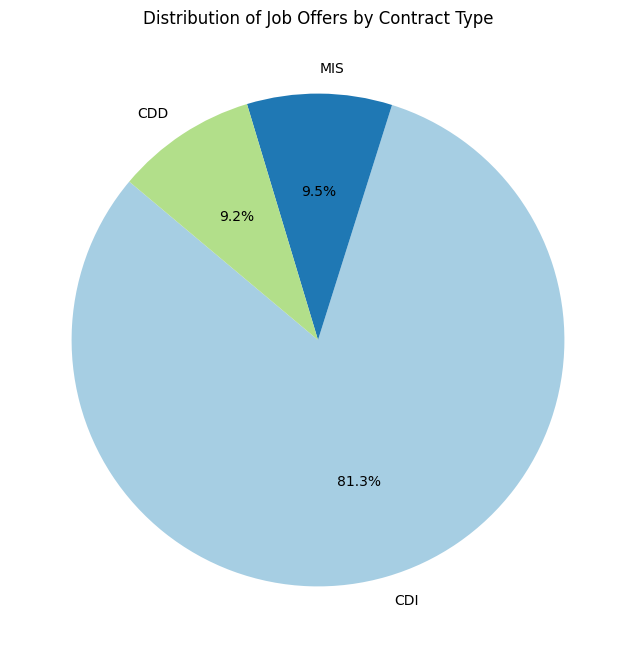

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(
    contract_counts['total_offers'],
    labels=contract_counts['typeContrat'],
    autopct='%1.1f%%',        # Show percentages
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Distribution of Job Offers by Contract Type")
plt.show()

In [18]:
import pandas as pd

# Drop rows without job title
df_jobs = df.dropna(subset=['intitule'])

# Count offers per job title
top_jobs = df_jobs['intitule'].value_counts().reset_index()
top_jobs.columns = ['intitule', 'total_offers']

# Sort descending and keep top 10
top_jobs = top_jobs.head(10)
top_jobs

,intitule,total_offers
0,Analyste-programmeur / Analyste-programmeuse i...,133
1,Coordinateur / Coordinatrice projet en Maîtris...,69
2,Serveur H/F,47
3,Développeur web (H/F),27
4,Chef de projet informatique (H/F),27
5,Product Owner (H/F),26
6,Consultant / Consultante informatique (H/F),24
7,Monteur câbleur (H/F),22
8,Chef de projet Maîtrise d'Ouvrage - MOA des sy...,22
9,Développeur / Développeuse informatique (H/F),19


In [19]:
import plotly.express as px

# Horizontal bar chart of top 10 job titles
fig = px.bar(
    top_jobs,
    x='total_offers',      # number of offers goes on x-axis
    y='intitule',          # job titles on y-axis
    text='total_offers',   # show counts
    orientation='h',       # horizontal bars
    title="Top 10 Job Titles with Most Offers"
)

fig.update_traces(textposition='outside')  # show numbers outside bars
fig.update_layout(
    xaxis_title="Number of Offers",
    yaxis_title="Job Title",
    yaxis=dict(autorange="reversed")        # largest at top
)

fig.show()

In [21]:
df.to_csv("clean_francetravail.csv")